In [28]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from preprocessing import preprocess

# Lee el archivo xlsx
df = pd.read_excel("../Abraham/data/cefr_leveled_texts.xlsx")
# Eliminar caracteres de escape y espacios en blanco al principio y al final de cada texto
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True).str.strip()
# Preprocesamiento de los textos y etiquetas
preproc_data, labels = preprocess(df)
# Escalado de los datos preprocesados
scaler = StandardScaler()
preproc_data = pd.DataFrame(scaler.fit_transform(preproc_data), columns=preproc_data.columns)
# Agregar la columna 'label' al DataFrame preprocesado
preproc_data['label'] = labels
# Mostrar una muestra de los datos preprocesados con la columna 'label' al final
preproc_data.sample(5)


,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,...,mean_part,mean_pron,mean_propn,mean_punct,mean_sconj,mean_sym,mean_verb,mean_x,mean_space,label
607,0.515701,-0.381565,-0.468756,-0.436151,-0.549244,-0.059579,0.531522,-0.163461,-0.467275,-0.493788,...,-0.691955,1.817150,-0.515423,-0.505464,0.096733,-0.316095,-0.394340,0.105914,0.424595,2
355,0.241604,-0.566726,-0.053314,-0.345853,-0.130981,-0.001229,-0.605651,0.262297,-0.126385,-0.102425,...,1.056917,1.302802,-0.141546,1.657173,0.161366,-0.316095,0.875482,-0.175144,0.424595,1
810,-0.544711,0.808756,0.362128,0.745241,0.349248,0.450009,-0.131829,0.175210,0.428781,0.484620,...,0.915879,-0.259290,-0.012128,-0.484262,0.032100,-0.316095,0.821676,1.230149,-0.890927,3
571,0.066920,0.015209,-0.185500,-0.072453,-0.316876,0.166040,-0.337151,-0.631150,-0.307544,-0.298107,...,-0.184218,1.379002,-0.759881,-0.229834,-0.614228,-0.316095,-0.200638,-0.175144,-0.627822,2
1237,-0.211912,0.438434,0.248825,0.672501,0.395721,0.714528,2.647927,0.465499,0.440468,0.680302,...,-0.466294,-0.506939,1.274871,-0.399452,-0.000216,-0.316095,0.208288,-0.175144,0.424595,4


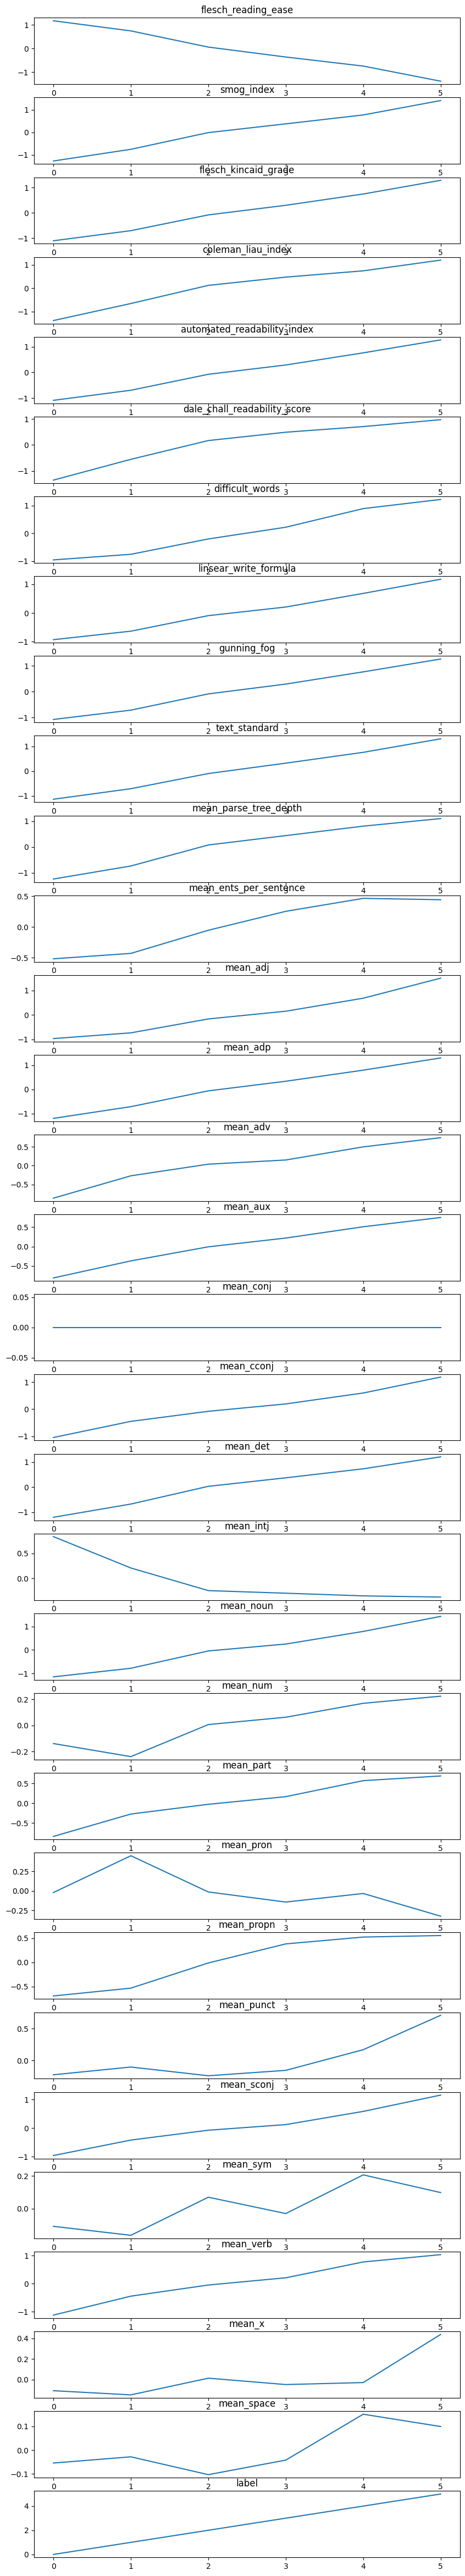

In [29]:
import matplotlib.pyplot as plt

mean_scores = {}
for column in preproc_data.columns:
    mean = preproc_data.groupby("label")[column].mean()
    mean_scores[column] = mean


fig, axs = plt.subplots(len(mean_scores))
fig.set_size_inches((10, 60))
for i, (title, data) in enumerate(mean_scores.items()):
    axs[i].plot(data.index, data.values)
    axs[i].set_title(title)


In [31]:
preproc_data.to_csv("data/CEFR/preprocessed_cefr_leveled_texts.csv", index=False)